# I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("heart_pre.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [5]:
dataset.head()

,age,sex,chestPain,restingBloodSugar,cholestrol,fastingBloodsugar,restingElectroCardiographicResult,maximumHeartRateAchived,exersiseIncludeAngina,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,chestPain,restingBloodSugar,cholestrol,fastingBloodsugar,restingElectroCardiographicResult,maximumHeartRateAchived,exersiseIncludeAngina,oldpeak,slope,ca,thal,target
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3,0
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1


#### Description

In [7]:
dataset.describe()

,age,sex,chestPain,restingBloodSugar,cholestrol,fastingBloodsugar,restingElectroCardiographicResult,maximumHeartRateAchived,exersiseIncludeAngina,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                303 non-null    int64  
 1   sex                                303 non-null    int64  
 2   chestPain                          303 non-null    int64  
 3   restingBloodSugar                  303 non-null    int64  
 4   cholestrol                         303 non-null    int64  
 5   fastingBloodsugar                  303 non-null    int64  
 6   restingElectroCardiographicResult  303 non-null    int64  
 7   maximumHeartRateAchived            303 non-null    int64  
 8   exersiseIncludeAngina              303 non-null    int64  
 9   oldpeak                            303 non-null    float64
 10  slope                              303 non-null    int64  
 11  ca                                 303 non-null    int64  

#### Let's understand our columns better:

In [8]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
chestPain:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
restingBloodSugar:			resting blood pressure
cholestrol:			 serum cholestoral in mg/dl
fastingBloodsugar:			fasting blood sugar > 120 mg/dl
restingElectroCardiographicResult:			resting electrocardiographic results (values 0,1,2)
maximumHeartRateAchived:			 maximum heart rate achieved
exersiseIncludeAngina:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [9]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [39]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [10]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target                               1.000000
exersiseIncludeAngina                0.436757
chestPain                            0.433798
oldpeak                              0.430696
maximumHeartRateAchived              0.421741
ca                                   0.391724
slope                                0.345877
thal                                 0.344029
sex                                  0.280937
age                                  0.225439
restingBloodSugar                    0.144931
restingElectroCardiographicResult    0.137230
cholestrol                           0.085239
fastingBloodsugar                    0.028046
Name: target, dtype: float64


## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

C:\Users\SIBA\AppData\Local\Temp\ipykernel_6664\26263300.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


1    165
0    138
Name: target, dtype: int64


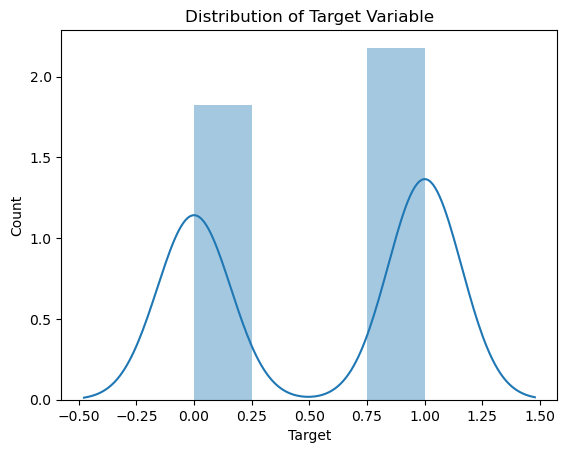

In [11]:
y = dataset["target"]

sns.distplot(y)


plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
# Calculating the count of each unique value in the "target" variable
target_temp = dataset.target.value_counts()

print(target_temp)
plt.show()

In [12]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [154]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='Density'>

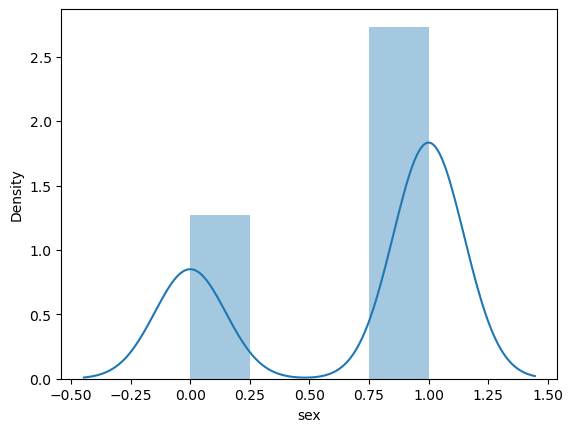

In [155]:
sns.distplot(dataset["sex"])

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [156]:
dataset["chestPain"].unique()

array([3, 2, 1, 0], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

<Axes: xlabel='chestPain', ylabel='Density'>

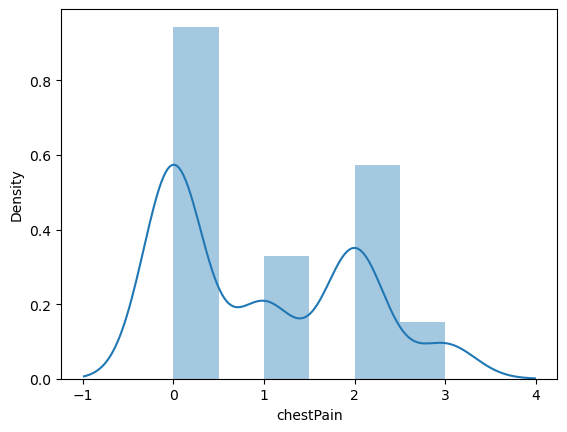

In [157]:
sns.distplot(dataset["chestPain"])

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [158]:
dataset["fastingBloodsugar"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fastingBloodsugar, dtype: float64

In [159]:
dataset["fastingBloodsugar"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='fastingBloodsugar', ylabel='Density'>

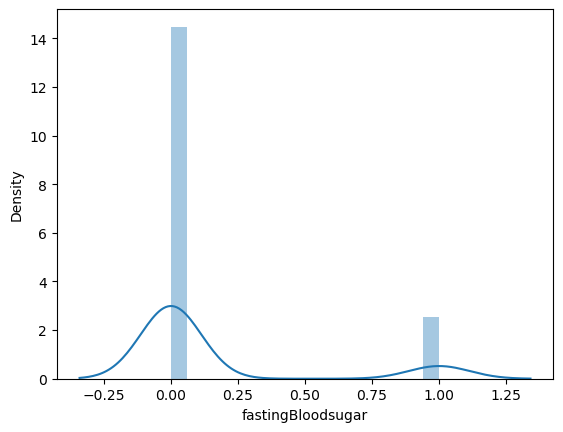

In [160]:
sns.distplot(dataset["fastingBloodsugar"])

##### Nothing extraordinary here

### Analysing the restecg feature

In [161]:
dataset["restingElectroCardiographicResult"].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='restingElectroCardiographicResult', ylabel='Density'>

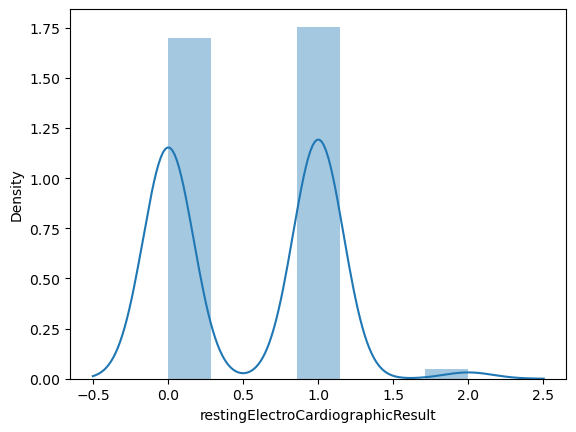

In [162]:
sns.distplot(dataset["restingElectroCardiographicResult"])

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [163]:
dataset["exersiseIncludeAngina"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exersiseIncludeAngina', ylabel='Density'>

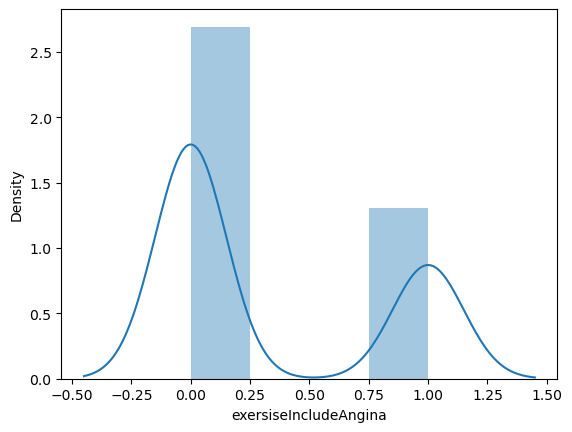

In [164]:
sns.distplot(dataset["exersiseIncludeAngina"])

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [122]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='slope', ylabel='Density'>

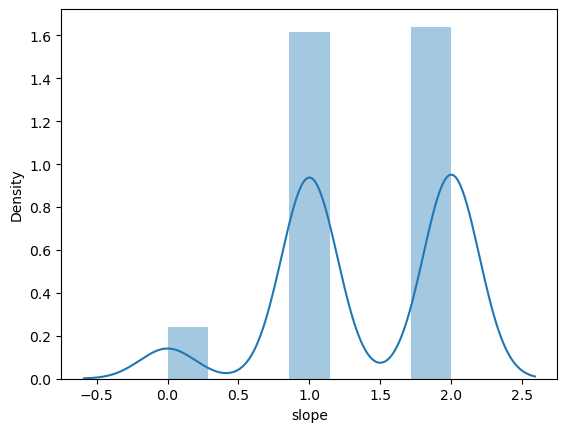

In [166]:
sns.distplot(dataset["slope"])

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [30]:
#number of major vessels (0-3) colored by flourosopy

In [167]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<Axes: xlabel='ca', ylabel='Density'>

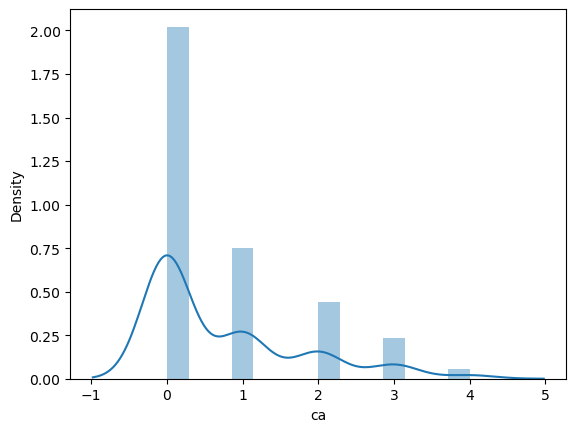

In [170]:
sns.distplot(dataset["ca"])

##### ca=4 has astonishingly large number of heart patients

In [172]:
# Analysing the 'thal' feature

In [171]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='thal', ylabel='Density'>

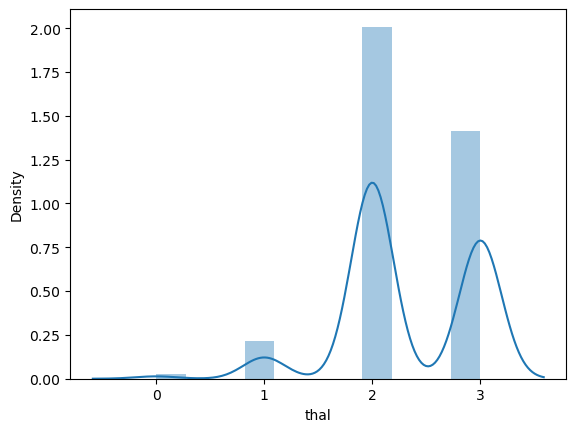

In [174]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [13]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [14]:
predictors.head()

,age,sex,chestPain,restingBloodSugar,cholestrol,fastingBloodsugar,restingElectroCardiographicResult,maximumHeartRateAchived,exersiseIncludeAngina,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [177]:
X_train.shape

(242, 13)

In [178]:
X_test.shape

(61, 13)

In [179]:
Y_train.shape

(242,)

In [180]:
Y_test.shape

(61,)

In [181]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.10,random_state=0)

In [182]:
predictors.head()

,age,sex,chestPain,restingBloodSugar,cholestrol,fastingBloodsugar,restingElectroCardiographicResult,maximumHeartRateAchived,exersiseIncludeAngina,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [183]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [184]:
X_train.shape

(272, 13)

In [185]:
X_test.shape

(31, 13)

In [186]:
Y_train.shape

(272,)

In [187]:
Y_test.shape

(31,)

## V. Model Fitting

In [15]:
from sklearn.metrics import accuracy_score

### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [17]:
print(Y_pred_dt.shape)

(61,)


In [18]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [19]:
from sklearn.feature_selection import SelectFromModel
best_features = SelectFromModel(DecisionTreeClassifier())
best_features.fit(predictors,target)

transformedX = best_features.transform(predictors)
print(f"Old Shape: {predictors.shape}, New shape: {transformedX.shape}")

Old Shape: (303, 13), New shape: (303, 5)


# K-Fold Cross Validation 5 & 10

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cv_scores = cross_val_score(estimator = dt, X = X_train,y = Y_train , cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(estimator = dt , X = X_train , y = Y_train , cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Scores:", cv_scores.std())

Cross-Validation Scores: [0.71428571 0.7755102  0.75       0.75       0.77083333]
Mean Accuracy: 0.7521258503401361
Standard Deviation of Scores: 0.021622730150481342


In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cv_scores = cross_val_score(estimator = dt, X = X_train,y = Y_train , cv=10, scoring='accuracy')
cv_predictions = cross_val_predict(estimator = dt , X = X_train , y = Y_train , cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Scores:", cv_scores.std())

Cross-Validation Scores: [0.8        0.64       0.83333333 0.66666667 0.91666667 0.66666667
 0.79166667 0.83333333 0.79166667 0.875     ]
Mean Accuracy: 0.7815000000000001
Standard Deviation of Scores: 0.0890675461533424


# Accuracy Score Acieved By Decision Tree

In [24]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [25]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))


NameError: name 'y_pred' is not defined

# Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix



Y_true = Y_test  # Replace y_test with the actual true labels from your testing set
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(Y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[21  6]
 [ 9 25]]


<Axes: >

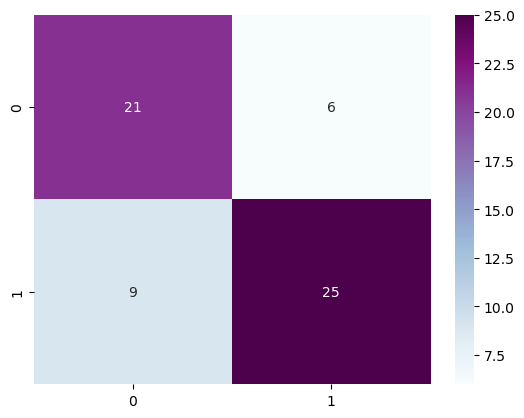

In [27]:
sns.heatmap(cm, annot=True,cmap = 'BuPu')

In [29]:
#METHOD #01
print("Accuracy Score of Confusion Matrix")
#confusion_matrix(y_test,pred)
score = accuracy_score(Y_test,y_pred)
score

Accuracy Score of Confusion Matrix


0.7540983606557377

In [30]:
# Method2
# Accuracy 
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print("Accuracy Score" , (TP+TN)/(TP+TN+FN+FP))

Accuracy Score 0.7540983606557377


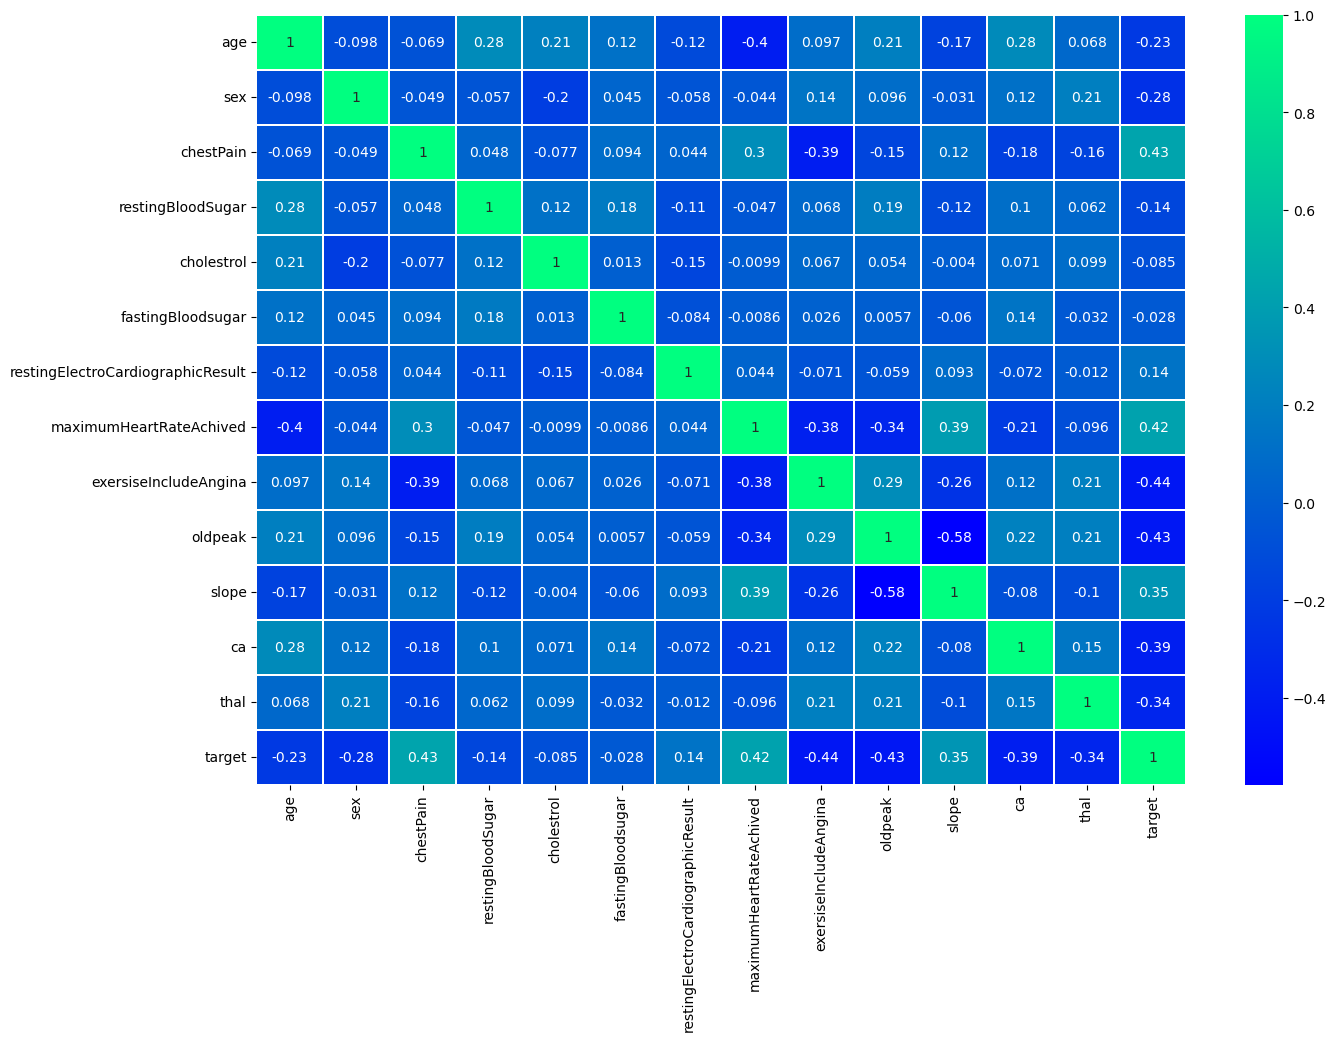

<Figure size 640x480 with 0 Axes>

In [200]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

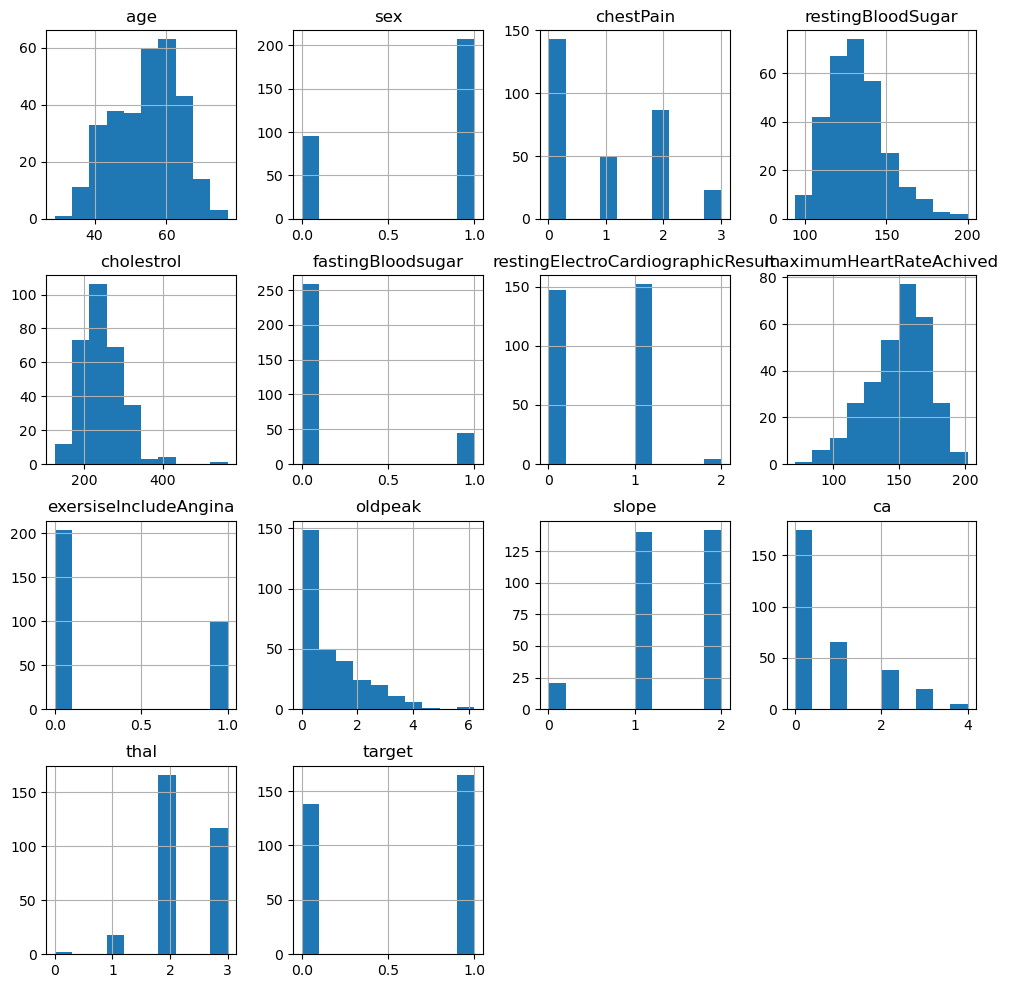

In [31]:
dataset.hist(figsize=(12,12))
plt.savefig('featuresplot')

In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.81      0.74      0.77        34

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



In [33]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))


Mean Absolute Error: 0.2459016393442623
Mean Squared Error: 0.2459016393442623
Root Mean Squared Error: 0.4958847036804647


In [34]:
kf =KFold(n_splits=5, shuffle=True, random_state=100)
y="target"
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 4, Test set:2
Fold:2, Train set: 5, Test set:1
Fold:3, Train set: 5, Test set:1
Fold:4, Train set: 5, Test set:1
Fold:5, Train set: 5, Test set:1


In [35]:
kf =KFold(n_splits=6, shuffle=True, random_state=42)
y="target"
cnt = 5
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:5, Train set: 5, Test set:1
Fold:6, Train set: 5, Test set:1
Fold:7, Train set: 5, Test set:1
Fold:8, Train set: 5, Test set:1
Fold:9, Train set: 5, Test set:1
Fold:10, Train set: 5, Test set:1
